In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [56]:
data = pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [58]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [59]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

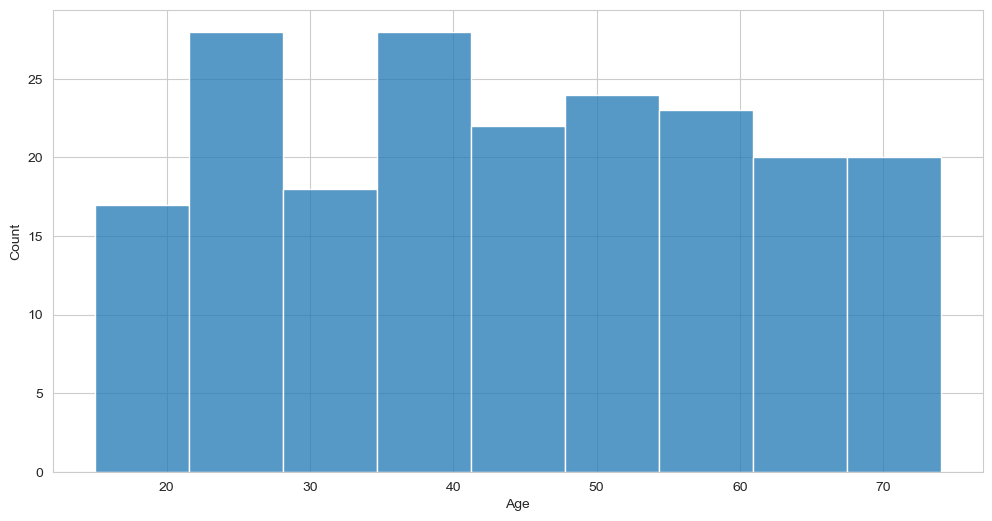

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'])

<Axes: xlabel='Sex', ylabel='Count'>

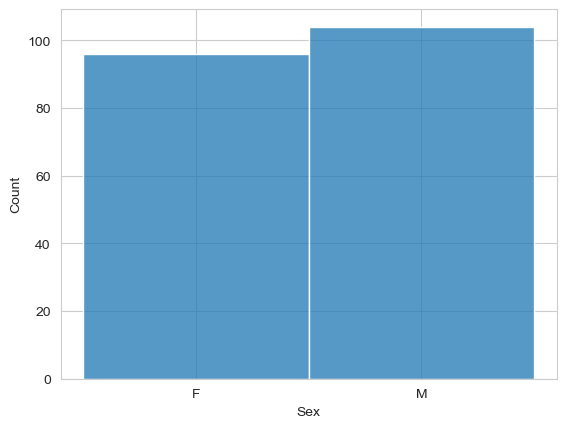

In [61]:
sns.histplot(data['Sex'])

<Axes: xlabel='BP', ylabel='Count'>

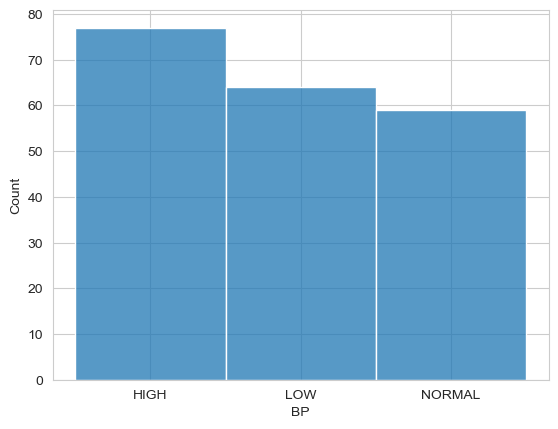

In [62]:
sns.histplot(data['BP'])

<Axes: xlabel='Drug', ylabel='Count'>

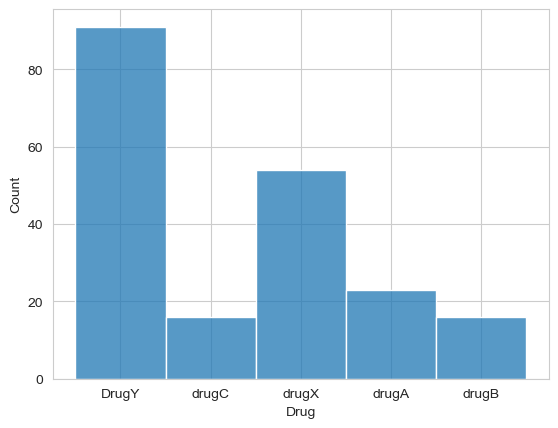

In [63]:
sns.histplot(data['Drug'])

In [ ]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
cat_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']


In [64]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [12]:
categorical = ['Sex', 'BP', 'Cholesterol']

for col in categorical:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    X[col].astype(np.int64)

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
y

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [15]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
dtypes: float64(1), int32(3), int64(1)
memory usage: 5.6 KB


<Axes: xlabel='Age', ylabel='Na_to_K'>

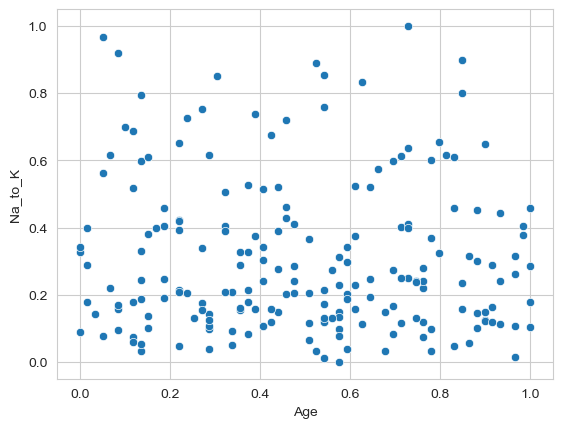

In [47]:
sns.scatterplot(x=X['Age'], y=X['Na_to_K'])

In [18]:
minmax = MinMaxScaler()
X = pd.DataFrame(minmax.fit_transform(X), columns=X.columns)

In [19]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.135593,0.0,0.0,0.0,0.596848
1,0.542373,1.0,0.5,0.0,0.213397
2,0.542373,1.0,0.5,0.0,0.120239
3,0.220339,0.0,1.0,0.0,0.047814
4,0.779661,0.0,0.5,0.0,0.368191
...,...,...,...,...,...
195,0.694915,0.0,0.5,0.0,0.165676
196,0.016949,1.0,0.5,0.0,0.179405
197,0.627119,1.0,1.0,0.0,0.113359
198,0.135593,1.0,1.0,1.0,0.242385


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
169,0.084746,0.0,0.0,0.0,0.156139
97,0.694915,0.0,0.0,0.0,0.598099
31,1.000000,1.0,0.0,0.0,0.103133
12,0.474576,1.0,0.5,0.0,0.284790
35,0.525424,1.0,1.0,1.0,0.031772
...,...,...,...,...,...
106,0.118644,1.0,1.0,0.0,0.177747
14,0.593220,0.0,1.0,0.0,0.201201
92,0.237288,0.0,0.0,0.0,0.724905
179,0.881356,0.0,1.0,0.0,0.300894


In [29]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
95,0.355932,1.0,0.5,1.0,0.161205
15,0.016949,0.0,0.0,1.0,0.289168
30,0.050847,0.0,1.0,1.0,0.077585
158,0.745763,0.0,0.5,0.0,0.130559
128,0.542373,1.0,0.5,1.0,0.852868
115,0.610169,1.0,0.0,0.0,0.376071
69,0.050847,0.0,0.0,1.0,0.563106
170,0.220339,0.0,1.0,0.0,0.206705
174,0.457627,1.0,0.0,1.0,0.203171
45,0.864407,0.0,1.0,1.0,0.057477


In [30]:
y_train

array([1, 0, 2, 0, 4, 0, 0, 0, 0, 2, 4, 4, 4, 2, 1, 4, 0, 4, 1, 4, 3, 0,
       1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 4, 0, 0, 4, 2, 4,
       0, 1, 3, 0, 4, 4, 0, 0, 4, 4, 2, 0, 2, 4, 0, 0, 0, 2, 3, 1, 0, 0,
       0, 1, 4, 4, 0, 3, 0, 0, 4, 2, 4, 4, 0, 0, 0, 0, 0, 0, 2, 4, 3, 1,
       0, 1, 1, 4, 0, 0, 0, 0, 4, 0, 1, 4, 0, 0, 4, 0, 4, 2, 0, 0, 3, 4,
       0, 0, 0, 0, 4, 0, 4, 4, 0, 3, 3, 0, 3, 0, 2, 4, 0, 4, 0, 0, 0, 4,
       0, 0, 0, 4, 4, 0, 0, 3])

In [31]:
y_test

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 1, 0, 0, 0])

In [41]:
rfc_gini = RandomForestClassifier(criterion='gini')

In [42]:
scores = cross_val_score(rfc_gini, X_train, y_train, cv=5)

In [43]:
print(f'Cross-validation scores: {scores}')
print(f'Average score: {scores.mean()}')

Cross-validation scores: [1.         1.         1.         0.96428571 1.        ]
Average score: 0.9928571428571429


In [33]:
y_pred = rfc_gini.predict(X_test)
y_pred

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 1, 0, 0, 0])

In [34]:
y_test

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 1, 0, 0, 0])

In [35]:
print(f'Accuracy prediction: {accuracy_score(y_test, y_pred)}')

Accuracy prediction: 1.0


In [36]:
rfc_entropy = RandomForestClassifier(criterion='entropy')
rfc_entropy.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [37]:
y_pred = rfc_entropy.predict(X_test)

In [38]:
print(f'Accuracy prediction: {accuracy_score(y_test, y_pred)}')

Accuracy prediction: 1.0


In [48]:
dtc = DecisionTreeClassifier(random_state=42, criterion='gini', splitter='best')
y_pred = dtc.fit(X_train, y_train).predict(X_test)
y_pred

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 1, 0, 0, 0])